<a href="https://colab.research.google.com/github/sharponlooker/reboundNotebooks/blob/master/Catalina_TNOs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook for orbital representation of TNOs found in Catalina Sky Survey Zooniverse project

<br>

Results listed at 
https://www.zooniverse.org/projects/fulsdavid/catalina-outer-solar-system-survey/about/results

<br>


In [ ]:
# exclude this line on your local environment if you already have REBOUND installed
!pip install rebound


     |████████████████████████████████| 245kB 3.0MB/s 
  Created wheel for rebound: filename=rebound-3.12.2-cp36-cp36m-linux_x86_64.whl size=561631 sha256=a92ee95ada41afe982c37c8c95f8d8e73c647f840dce6c576727970ace7f9471
  Stored in directory: /root/.cache/pip/wheels/e7/c5/a8/af7b610100ff48c07ea083aec02daca70488e435edca2f0b74
Successfully built rebound


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import rebound

from google.colab import files


ModuleNotFoundError: ignored

In [ ]:
sim = rebound.Simulation()

date = "2020-08-10 00:00"
sim.add("Sun", date=date)
#sim.add("Jupiter", date=date)
#sim.add("Saturn", date=date)
#sim.add("Uranus", date=date)
sim.add("Neptune", date=date)

sim.move_to_com()
sim.integrator = "whfast"
sim.t = 0

sim.collision_resolve = "merge"



Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).


In [ ]:
sim.add("2005 RS43", date=date)  # 308379 (2005 RS43) K05R43S
sim.add("2004 UX10", date=date)  # 144897 (2004 UX10) K04U10X   x2
sim.add("Lempo", date=date)      # 47171  Lempo       47171
sim.add("2014 XR40", date=date)  # 523772 (2014 XR40) K14X40R
sim.add("2002 UX25", date=date)  # 55637  (2002 UX25) K02U25X   x2

sim.add("2010 VZ98", date=date)  # 445473 (2010 VZ98) K10V98Z
sim.add("2014 YF50", date=date)  # 523777 (2014 YF50) K14Y50F
sim.add("2014 YA50", date=date)  #        (2014 YA50) K14Y50A

sim.add("Makemake", date=date)   # 136472 Makemake    136472

sim.add("2014 VU37", date=date)  # 523752 (2014 VU37) K14V37U
sim.add("2005 RM43", date=date)  # 145451 (2005 RM43) K05R43M




Searching NASA Horizons for '2005 RS43'... Found: 308379 (2005 RS43).
Searching NASA Horizons for '2004 UX10'... 

/usr/local/lib/python3.6/dist-packages/rebound/horizons.py:140: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


Found: 144897 (2004 UX10).
Searching NASA Horizons for 'Lempo'... Found: 47171 Lempo (1999 TC36).
Searching NASA Horizons for '2014 XR40'... Found: 523772 (2014 XR40).
Searching NASA Horizons for '2002 UX25'... Found: 55637 (2002 UX25).
Searching NASA Horizons for '2010 VZ98'... Found: 445473 (2010 VZ98).
Searching NASA Horizons for '2014 YF50'... Found: 523777 (2014 YF50).
Searching NASA Horizons for '2014 YA50'... Found: (2014 YA50).
Searching NASA Horizons for 'Makemake'... Found: 136472 Makemake (2005 FY9).
Searching NASA Horizons for '2014 VU37'... Found: 523752 (2014 VU37).
Searching NASA Horizons for '2005 RM43'... Found: 145451 (2005 RM43).


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

#sim.save("/content/drive/My Drive/catalina/2020-09-14.sim")
#sim = rebound.Simulation("/content/drive/My Drive/catalina/2020-09-14.sim")


/usr/local/lib/python3.6/dist-packages/rebound/simulation.py:488: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


/usr/local/lib/python3.6/dist-packages/rebound/plotting.py:81: MatplotlibDeprecationWarning: In a future version, 'pad' will default to rcParams['figure.subplot.hspace'].  Set pad=0 to keep the old behavior.
  ax_top   = divider.append_axes("top",  size="%.2f%%"%(100.*slices), sharex=ax_main)
/usr/local/lib/python3.6/dist-packages/rebound/plotting.py:83: MatplotlibDeprecationWarning: In a future version, 'pad' will default to rcParams['figure.subplot.wspace'].  Set pad=0 to keep the old behavior.
  ax_right = divider.append_axes("right", size="%.2f%%"%(100.*slices), sharey=ax_main)


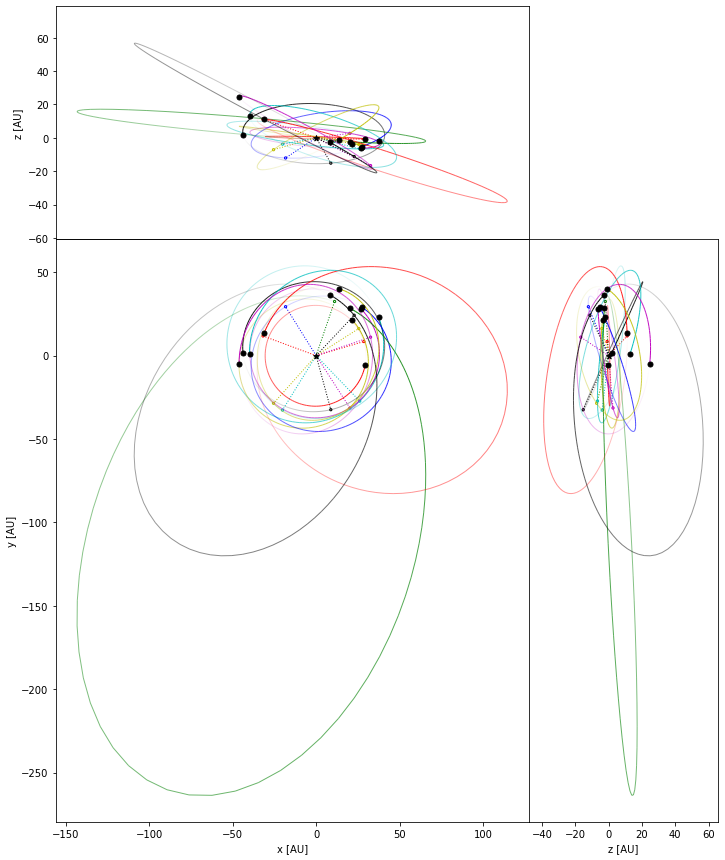

In [ ]:
fig = rebound.OrbitPlot(sim, figsize = (25, 15)
  , unitlabel="[AU]"
  , color=True, periastron=True
  , slices=0.4
  #, xlim = 60, ylim = 60
  #, plotparticles = (4, 5, 6)
  #, fancy=True
);



In [ ]:

fig[0].tight_layout()
fig[0].savefig('plot.png', format='png')

files.download('plot.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sim.status()


---------------------------------
REBOUND version:     	3.12.2
REBOUND built on:    	Sep  1 2020 11:47:32
Number of particles: 	10
Selected integrator: 	whfast
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.0015134052706333983 y=0.0002925687316282363 z=2.8857344988553145e-05 vx=-1.7432837328104265e-06 vy=-9.298671375859886e-06 vz=2.315275058218485e-07>
<rebound.Particle object, m=5.151383772628674e-05 x=29.378616259862348 y=-5.679420220694265 z=-0.560186277362668 vx=0.0338410766845433 vy=0.18050822431959673 vz=-0.004494472088296811>
<rebound.Particle object, m=0.0 x=37.55764293118954 y=22.950278452362873 z=-2.011989455728543 vx=-0.053685505743911316 vy=0.14499230208965871 vz=0.024495834179869194>
<rebound.Particle object, m=0.0 x=27.02105781345608 y=27.905259341747588 z=-6.379467178881721 vx=-0.11007435078479486 vy=0.11420116770551586 vz=-0.00644848778131372>
<rebound.Particle object, m=

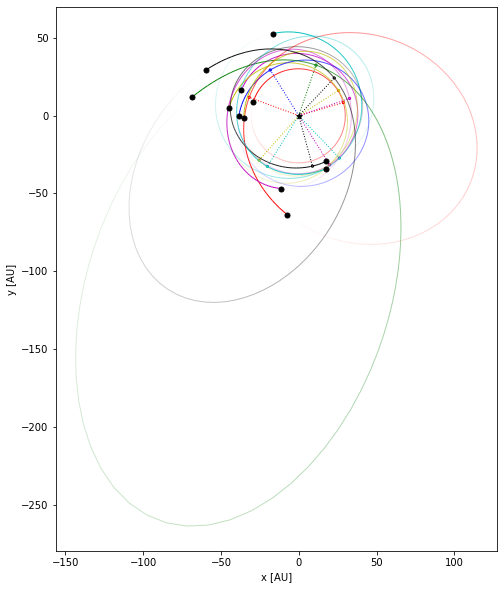

In [ ]:
# a short animation, but note that only the Sun and Neptune are included in the sim

from IPython.display import display, clear_output
import matplotlib.pyplot as plt
sim.move_to_com()
for i in range(100):
    sim.integrate(sim.t+5)
    fig, ax = rebound.OrbitPlot(sim,color=True,figsize=(10, 10), unitlabel="[AU]", periastron=True)
    display(fig)
    plt.close(fig)
    clear_output(wait=True)

In [ ]:
tnosStartIndex = 2 # assuming 0 Sun and 1 Neptune

tnos = sim.particles[tnosStartIndex:]

semimajorAxis = np.array(list(map(lambda x: x.a, tnos)))
eccentricities = np.array(list(map(lambda x: x.e, tnos)))
inclinations = np.array(list(map(lambda x: math.degrees(x.inc), tnos)))
argumentsOfPerihelion = np.array(list(map(lambda x: math.degrees(x.omega), tnos)))


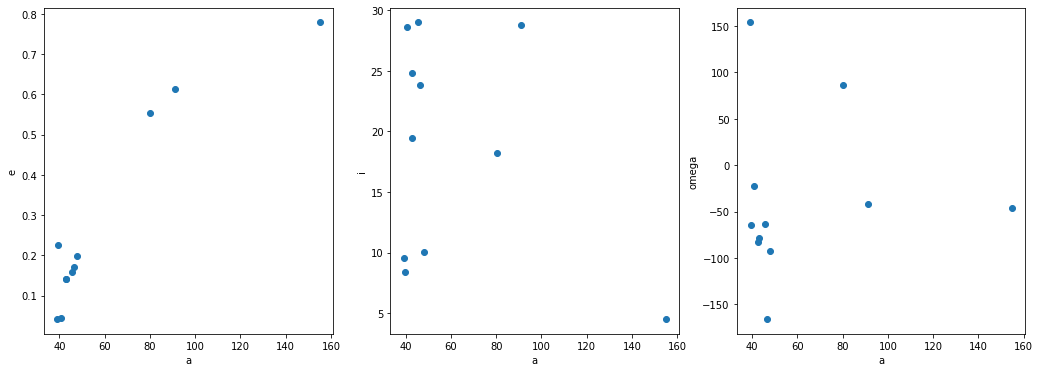

In [ ]:
plt.figure(figsize=(30, 6))
plt.tight_layout()

plt.subplot(1, 5, 1); plt.xlabel("a"); plt.ylabel("e")
plt.scatter(semimajorAxis, eccentricities);

plt.subplot(1, 5, 2); plt.xlabel("a"); plt.ylabel("i")
plt.scatter(semimajorAxis, inclinations);

plt.subplot(1, 5, 3); plt.xlabel("a"); plt.ylabel("omega")
plt.scatter(semimajorAxis, argumentsOfPerihelion);

#plt.subplot(1, 5, 3);
#plt.scatter(np.array(list(map(lambda x: x.x, tnos))), np.array(list(map(lambda x: x.y, tnos))));


In [ ]:
!pip install poliastro

import numpy as np


In [ ]:
import plotly.io as pio
pio.renderers.default = "colab"


In [ ]:
from poliastro.constants import J2000
from poliastro.plotting import *
from poliastro.twobody.orbit import Orbit
from poliastro.bodies import Neptune

bodies = ["2004 UX10", "Lempo", "Makemake", "2014 XR40", "2002 UX25", "2010 VZ98", "2014 YF50", "2014 YA50", "2014 VU37", "2005 RM43"]

frame = OrbitPlotter3D()

for body in bodies:
  frame.plot(Orbit.from_sbdb(body), label=body)

frame.plot_body_orbit(Neptune, J2000)
